In [1]:
from tensorflow.keras.datasets import mnist

2024-11-04 20:22:47.556717: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 20:22:47.557567: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 20:22:47.560513: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 20:22:47.568690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-04 20:22:47.584368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
x_test.dtype

dtype('uint8')

In [6]:
import matplotlib.pyplot as plt


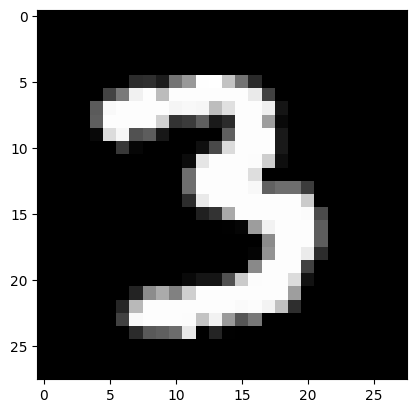

In [10]:
plt.imshow(x_test[500]/255, cmap=plt.cm.gray)

## TwoLayerNet in Keras

In [1]:
from tensorflow import keras


In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784, )),
    keras.layers.Dense(10, activation="softmax")
])

/home/umd-jrkwon/anaconda3/envs/ece5831-2024/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [34]:
# We need training data!!

from tensorflow.keras.datasets import mnist

In [71]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [72]:
x_train[0].shape

(28, 28)

In [50]:
x_test.shape

(10000, 28, 28)

In [52]:
keras.utils.to_categorical(y_train, num_classes=10)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

### Preprocess datasets

In [53]:
# Reshape 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [39]:
x_train.shape

(60000, 784)

In [54]:
# Normalize values to 0 .. 1
x_train = x_train/255.0
x_test = x_test/255.0

In [56]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)

In [42]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [44]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9078 - loss: 0.3202
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9119 - loss: 0.3089
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9122 - loss: 0.3037
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9165 - loss: 0.2931
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9178 - loss: 0.2892
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9180 - loss: 0.2870
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9181 - loss: 0.2837
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9213 - loss: 0.2763
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9247 - loss: 0.2643
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9242 - loss: 0.2649
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9255 - loss: 0.2607
Epoch 12/20
1875/1875 ━━━━━━━━

In [58]:
predictions = model.predict(x_test[0:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [60]:
import numpy as np

In [61]:
predictions = np.argmax(predictions, axis=1)

In [62]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [65]:
labels = np.argmax(y_test[0:10], axis=1)

In [66]:
labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [67]:
predictions == labels

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

# LeNet in Keras

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [83]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs)

In [84]:
lenet = LeNet(batch_size=64, epochs=10)

/home/umd-jrkwon/anaconda3/envs/ece5831-2024/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
lenet.train()

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2698 - loss: 1.9674
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9164 - loss: 0.2832
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9490 - loss: 0.1708
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9634 - loss: 0.1216
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9718 - loss: 0.0915
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9748 - loss: 0.0795
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9805 - loss: 0.0628
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9817 - loss: 0.0563
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9842 - loss: 0.0515
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9866 - loss: 0.0451


In [90]:
predictions = np.argmax(lenet.model.predict(x_test[0:10]), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [91]:
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [93]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [95]:
print(labels)

[7 2 1 0 4 1 4 9 5 9]


In [96]:
print(predictions == labels)

[ True  True  True  True  True  True  True  True  True  True]
